In [308]:
# http://data.bitcoinity.org/markets/price/all/USD/coinbase?r=day&t=l
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from scipy import stats, integrate
rcParams['figure.figsize'] = 14, 6
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from datetime import datetime
from datetime import timedelta

def trade(date, action):
    
    global df, wallet, risk
    
    btc_price = df[df.index == date]['avg'][0]
    print('\n\nDay {}'.format(date))
    
    if action == 'buy':
        amount = wallet['usd']*risk
        new_btc = amount / btc_price
        wallet['btc'] += new_btc
        wallet['usd'] -= amount
        wallet['btc_investment'] += amount
        wallet['cumulative_btc'] += new_btc
        print('Bought {} BTC with a price of {} USD with {} USD.'.format(new_btc, btc_price, amount))
    if action == 'sell':
        amount = wallet['btc']*risk
        new_usd = amount * btc_price        
        wallet['usd'] += new_usd
        wallet['btc'] -= amount
        print('Sold {} worth of BTC with a price of {} USD for {} BTC.'.format(new_usd, btc_price, amount))
        
        
def check_market(date):
    
    global wallet
    
    current_value = df[df.index == date]['avg'][0]
    btc_value = 0 if wallet['btc'] == 0 else wallet['btc_investment'] / wallet['cumulative_btc'] 
    print('On day {} 1 BTC = {} USD'.format(date, current_value))
    print('In our portfolio 1 BTC = {} USD'.format(btc_value))
    
    percent_change = ((current_value / btc_value) - 1) * 100
    print(percent_change)
    
    if percent_change > 20:
        trade(date, 'sell')
    if percent_change < -10:
        trade(date, 'buy')

In [377]:
df = pd.read_csv('data/bitcoinity_data.csv', parse_dates=['Time']).rename(columns={'Time':'date'})
print(df.shape)
df = df[['date','avg']]
df.head()

(945, 4)


,date,avg
0,2014-12-01,335.000
1,2014-12-02,377.775
2,2014-12-03,377.792
3,2014-12-04,377.100
4,2014-12-06,378.000


In [378]:
df['next_date'] = df['date'].shift(-1)
df['next_avg'] = df['avg'].shift(-1)
df = df.set_index('date')
df.head()

,avg,next_date,next_avg
date,,,
2014-12-01,335.000,2014-12-02,377.775
2014-12-02,377.775,2014-12-03,377.792
2014-12-03,377.792,2014-12-04,377.100
2014-12-04,377.100,2014-12-06,378.000
2014-12-06,378.000,2014-12-08,375.005


In [379]:
start_date = df.index.min()
stop_date = df.index.max()

while start_date < stop_date:
    
    if len(df[df.index == start_date]) == 0:
        prev_day = start_date - timedelta(days=1)  
        row = df[df.index == prev_day]
        avg = (row['avg'].iloc[0]+row['next_avg'].iloc[0])/2
        
        dummy_day = start_date
        while dummy_day < row['next_date'].iloc[0]:
            df.ix[dummy_day] = [avg, row['next_date'].iloc[0], avg]
            dummy_day += timedelta(days=1)
            
    start_date += timedelta(days=1)  # increase day one by one
    
del df['next_avg']
df.sort_index(inplace=True)
df['30_std'] = df['avg'].rolling(30).std()
df['30_mean'] = df['avg'].rolling(30).mean()
df['30_min'] = df['avg'].rolling(30).min()
df['30_max'] = df['avg'].rolling(30).max()

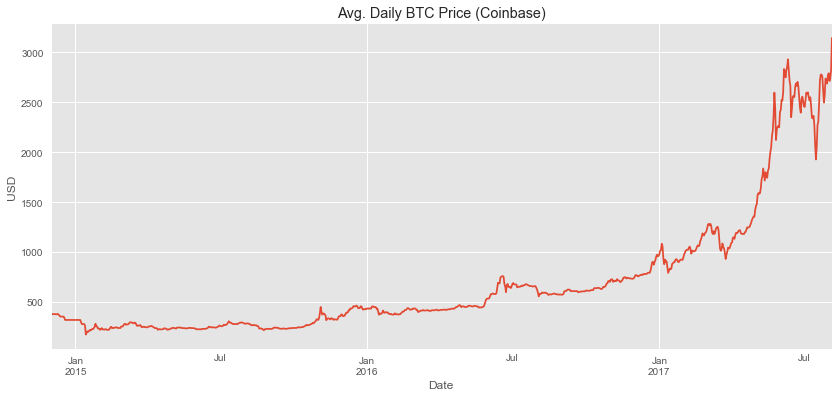

In [380]:
ax = df['avg'].plot(title='Avg. Daily BTC Price (Coinbase)');
ax.set_xlabel('Date')
ax.set_ylabel('USD')

In [345]:
wallet = {}
wallet['usd'] = 100
wallet['btc'] = 0
wallet['btc_investment'] = 0
wallet['cumulative_btc'] = 0
risk = 0.2

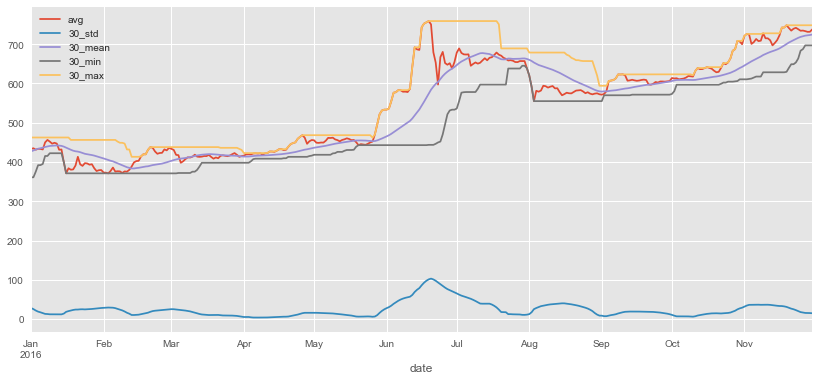

In [386]:
start_date = "2016-01-01"
stop_date = "2016-12-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

df[(df.index >= start_date) & (df.index < stop_date)].plot()

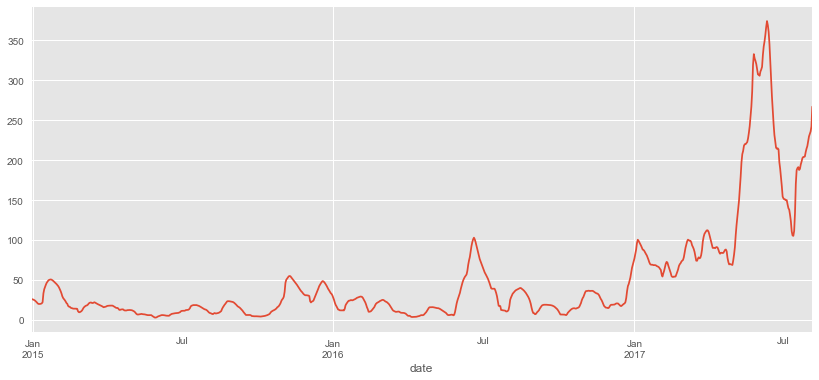

In [383]:
df['30_std'][29:].plot()

In [348]:
start_date = "2017-01-01"
stop_date = "2017-12-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

trade(start, 'buy')

while start < stop:
    check_market(start)
    start = start + timedelta(days=1)  # increase day one by one



Day 2017-01-01 00:00:00
Bought 0.0204195540166 BTC with a price of 979.453321251 USD with 20.0 USD.
On day 2017-01-01 00:00:00 1 BTC = 979.453321251 USD
In our portfolio 1 BTC = 979.453321251 USD
0.0
On day 2017-01-02 00:00:00 1 BTC = 1012.51923973 USD
In our portfolio 1 BTC = 979.453321251 USD
3.3759565429
On day 2017-01-03 00:00:00 1 BTC = 1019.29172665 USD
In our portfolio 1 BTC = 979.453321251 USD
4.0674123546
On day 2017-01-04 00:00:00 1 BTC = 1082.3010231 USD
In our portfolio 1 BTC = 979.453321251 USD
10.500521017
On day 2017-01-05 00:00:00 1 BTC = 1053.50511379 USD
In our portfolio 1 BTC = 979.453321251 USD
7.56052288896
On day 2017-01-06 00:00:00 1 BTC = 934.985373306 USD
In our portfolio 1 BTC = 979.453321251 USD
-4.54007832543
On day 2017-01-07 00:00:00 1 BTC = 877.5823145 USD
In our portfolio 1 BTC = 979.453321251 USD
-10.4008026254


Day 2017-01-07 00:00:00
Bought 0.0182319079768 BTC with a price of 877.5823145 USD with 16.0 USD.
On day 2017-01-08 00:00:00 1 BTC = 923.862

Sold 0.298565497888 worth of BTC with a price of 1208.76333001 USD for 0.000247000790374 BTC.
On day 2017-03-11 00:00:00 1 BTC = 1180.61297458 USD
In our portfolio 1 BTC = 889.777160157 USD
32.6863654683


Day 2017-03-11 00:00:00
Sold 0.233289870278 worth of BTC with a price of 1180.61297458 USD for 0.000197600632299 BTC.
On day 2017-03-12 00:00:00 1 BTC = 1205.88785715 USD
In our portfolio 1 BTC = 889.777160157 USD
35.5269511455


Day 2017-03-12 00:00:00
Sold 0.190627362444 worth of BTC with a price of 1205.88785715 USD for 0.000158080505839 BTC.
On day 2017-03-13 00:00:00 1 BTC = 1237.24187735 USD
In our portfolio 1 BTC = 889.777160157 USD
39.0507570604


Day 2017-03-13 00:00:00
Sold 0.156467057454 worth of BTC with a price of 1237.24187735 USD for 0.000126464404672 BTC.
On day 2017-03-14 00:00:00 1 BTC = 1246.95675504 USD
In our portfolio 1 BTC = 889.777160157 USD
40.1425897263


Day 2017-03-14 00:00:00
Sold 0.126156514942 worth of BTC with a price of 1246.95675504 USD for 0.0001011

On day 2017-05-19 00:00:00 1 BTC = 1937.67195115 USD
In our portfolio 1 BTC = 889.777160157 USD
117.77047534


Day 2017-05-19 00:00:00
Sold 1.43254361781e-06 worth of BTC with a price of 1937.67195115 USD for 7.39311737966e-10 BTC.
On day 2017-05-20 00:00:00 1 BTC = 2001.62436241 USD
In our portfolio 1 BTC = 889.777160157 USD
124.957939138


Day 2017-05-20 00:00:00
Sold 1.1838595089e-06 worth of BTC with a price of 2001.62436241 USD for 5.91449390373e-10 BTC.
On day 2017-05-21 00:00:00 1 BTC = 2053.25590738 USD
In our portfolio 1 BTC = 889.777160157 USD
130.760689229


Day 2017-05-21 00:00:00
Sold 9.71517563759e-07 worth of BTC with a price of 2053.25590738 USD for 4.73159512298e-10 BTC.
On day 2017-05-22 00:00:00 1 BTC = 2165.90273431 USD
In our portfolio 1 BTC = 889.777160157 USD
143.420805939


Day 2017-05-22 00:00:00
Sold 8.19853985163e-07 worth of BTC with a price of 2165.90273431 USD for 3.78527609839e-10 BTC.
On day 2017-05-23 00:00:00 1 BTC = 2216.49185722 USD
In our portfolio 

Day 2017-07-12 00:00:00
Sold 1.0106685078e-11 worth of BTC with a price of 2338.41632536 USD for 4.32202126214e-15 BTC.
On day 2017-07-13 00:00:00 1 BTC = 2364.0364522 USD
In our portfolio 1 BTC = 889.777160157 USD
165.688596882


Day 2017-07-13 00:00:00
Sold 8.17393264872e-12 worth of BTC with a price of 2364.0364522 USD for 3.45761700971e-15 BTC.
On day 2017-07-14 00:00:00 1 BTC = 2275.13444764 USD
In our portfolio 1 BTC = 889.777160157 USD
155.697105917


Day 2017-07-14 00:00:00
Sold 6.29323485242e-12 worth of BTC with a price of 2275.13444764 USD for 2.76609360777e-15 BTC.
On day 2017-07-15 00:00:00 1 BTC = 2081.20036846 USD
In our portfolio 1 BTC = 889.777160157 USD
133.901302669


Day 2017-07-15 00:00:00
Sold 4.60543602856e-12 worth of BTC with a price of 2081.20036846 USD for 2.21287488622e-15 BTC.
On day 2017-07-16 00:00:00 1 BTC = 1927.0129503 USD
In our portfolio 1 BTC = 889.777160157 USD
116.572534853


Day 2017-07-16 00:00:00
Sold 3.41139085051e-12 worth of BTC with a price

IndexError: index out of bounds

In [324]:
df.head()

,avg,next_date,next_avg
date,,,
2014-12-01,335.000,2014-12-02,377.775
2014-12-02,377.775,2014-12-03,377.792
2014-12-03,377.792,2014-12-04,377.100
2014-12-04,377.100,2014-12-06,378.000
2014-12-06,378.000,2014-12-08,375.005


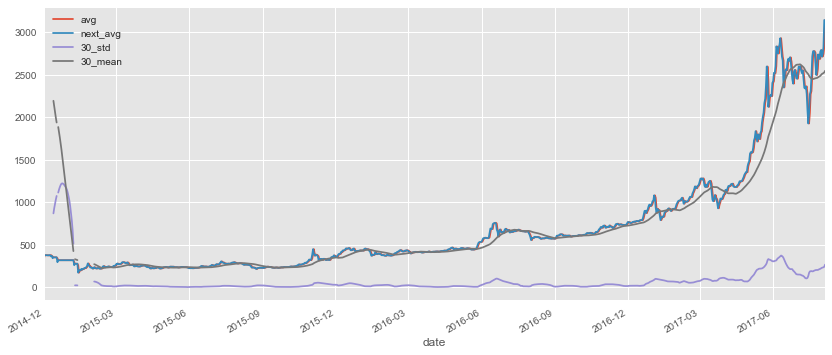

In [317]:
wallet

{'btc': 8.1640673386358969e-17,
 'btc_investment': 48.8,
 'cumulative_btc': 0.05484519291479089,
 'usd': 114.94495262041767}

In [92]:
df[df.index == '2014-12-08']['avg'][0]

375.005

In [46]:
df['avg'].head()

date
2014-12-01   335.000
2014-12-02   377.775
2014-12-03   377.792
2014-12-04   377.100
2014-12-06   378.000
Name: avg, dtype: float64

In [50]:
df['avg'].rolling(2).mean().shift(-1)

date
2014-12-01    356.387
2014-12-02    377.784
2014-12-03    377.446
2014-12-04    377.550
2014-12-06    376.502
2014-12-08    377.128
2014-12-10    371.074
2014-12-12    352.699
2014-12-18    318.908
2015-01-08    277.658
2015-01-13    216.157
2015-01-14    182.404
2015-01-15    198.808
2015-01-16    202.561
2015-01-17    208.878
2015-01-19    215.628
2015-01-20    217.918
2015-01-21    224.860
2015-01-22    226.776
2015-01-23    232.464
2015-01-24    244.100
2015-01-25    265.311
2015-01-26    270.981
2015-01-27    256.864
2015-01-28    243.256
2015-01-29    233.902
2015-01-30    231.895
2015-01-31    224.717
2015-02-01    223.434
2015-02-02    232.025
               ...   
2017-07-07   2535.366
2017-07-08   2535.143
2017-07-09   2503.350
2017-07-10   2401.247
2017-07-11   2342.597
2017-07-12   2351.226
2017-07-13   2319.585
2017-07-14   2178.167
2017-07-15   2004.107
2017-07-16   1990.228
2017-07-17   2162.683
2017-07-18   2290.122
2017-07-19   2399.535
2017-07-20   2604.136
2017-